# Derivada de una imagen robusta a ruido

Unas de los problemas a la hora de calcular la derivada de una imagen usando cualquier kernel de convolución, ya sea el *Sobel*, el *Prewitt* o cualquier otro, es que este método no es robusto al ruido que pueda tener la imágen y, como sabemos, el ruido puede generar unos sobresaltos muy bruscos en la derivada.

Una de las cosas que se recomienda para poder manejar este problema es usar la derivada del filtro Gaussiano, es decir:

$$
\frac{\partial I}{\partial x} = I \ast G_{\sigma x} \qquad \frac{\partial I}{\partial y} = I \ast G_{\sigma y} 
$$

Donde $G_{\sigma x}$ y $G_{\sigma y}$ representan la derivada con respecto a $x$ y $y$ de la función Gaussiana $G_{\sigma}$

$$
G_{\sigma}=\frac{1}{2\pi \sigma} e^{-(x^2+y^2)/2\sigma^2}
$$

Es decir que:

$$
G_{\sigma x} = -\frac{x}{2\pi \sigma^3} e^{-(x^2+y^2)/2\sigma^2} \qquad
G_{\sigma y} = -\frac{y}{2\pi \sigma^3} e^{-(x^2+y^2)/2\sigma^2}
$$

Creando estos dos filtros para un $\sigma = 3$:

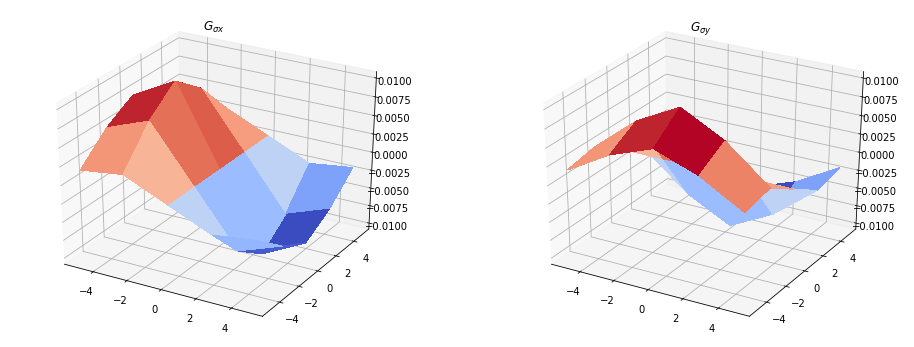

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

sigma = 3
x,y = np.meshgrid(np.linspace(-5,5,5),np.linspace(-5,5,5))
Gx = -x/(2*np.pi*sigma**3)*np.exp(-(x**2+y**2)/(2*sigma**2))
Gy = -y/(2*np.pi*sigma**3)*np.exp(-(x**2+y**2)/(2*sigma**2))


fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x,y,Gx,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_title(r'$G_{\sigma x}$')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x,y,Gy,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_title(r'$G_{\sigma y}$')
plt.show()

Teniendo ya estos dos filtros podemos usar la función de convolución usada en el archivo *ch01_example1.ipynb* para calcular la derivada en $x$ y $y$ de la imagen.

In [2]:
def conv(im,k):
    r,c = k.shape

    if not r == c or len(im.shape) == 3: #Revisamos que el kernel sea cuadrado y que la imagen este en escala de grices
        return None


    row, colum = im.shape
    shift = int((r-1)/2)

    output = np.zeros(im[shift:-shift,shift:-shift].shape)
    k = np.rot90(k,2) #Invertimos la imgen en ambas direcciones (lo cual es equivalente a girar el kernel 180°)
    
    for m,i in enumerate(np.arange(shift,row-shift-1)):
        for l,j in enumerate(np.arange(shift,colum-shift-1)):
            window = im[i-shift:i+shift+1,j-shift:j+shift+1]
            output[m,l] = (window*k).sum()

    return output

Usando también la siguiente imagen de prueba tenemos:

![](Edificio.png)

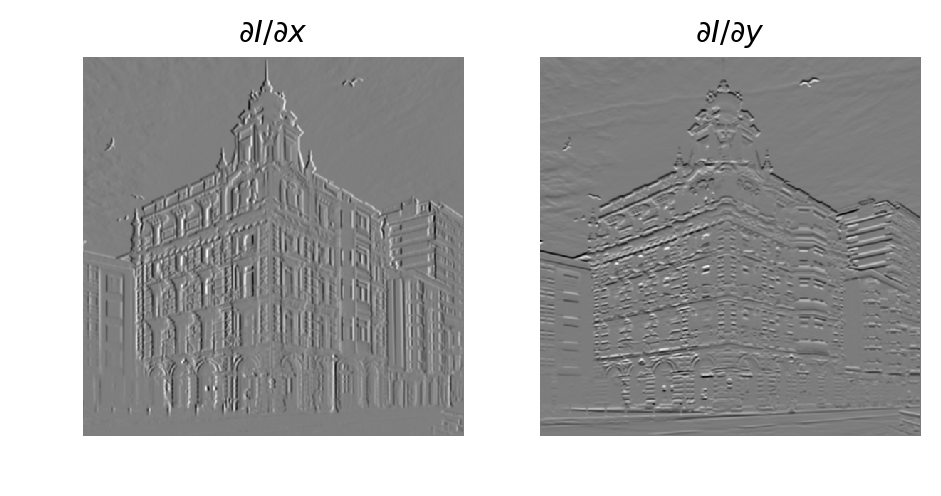

In [3]:
from PIL import Image

im = np.array(Image.open('Edificio.png').convert('L'), np.float32)

imx = conv(im,Gx)
imy = conv(im,Gy)

plt.figure(dpi = 180)
plt.subplot(121), plt.imshow(imx,cmap='gray'), plt.axis('off'), plt.title(r'$\partial I/\partial x$')
plt.subplot(122), plt.imshow(imy,cmap='gray'), plt.axis('off'), plt.title(r'$\partial I/\partial y$')
plt.show()

Como vemos, el resultado es un poco más limpio y se puede apreciar de forma más clara los cambios en cada dirección en comparación a usar ulgún otro filtro sin suavizado. Graficando ahora la magnitud del gradiente:

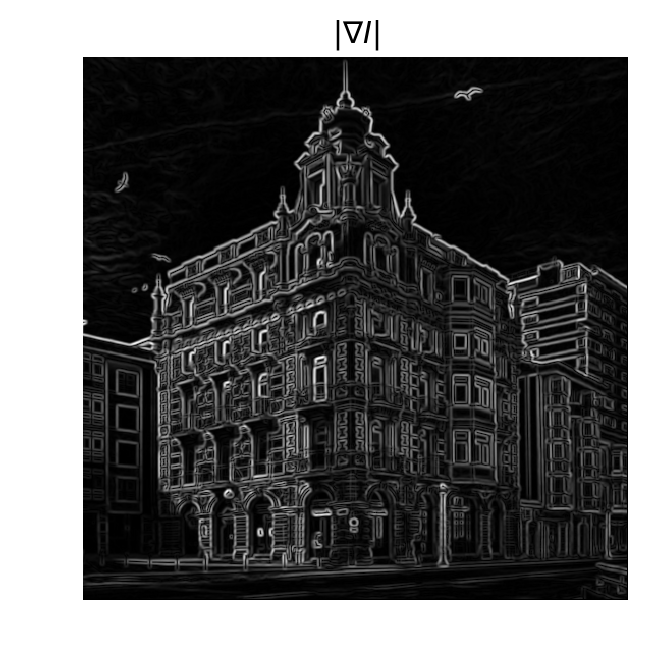

In [4]:
mag = np.sqrt(imx**2+imy**2)
plt.figure(dpi = 180)
plt.imshow(mag,cmap='gray'), plt.axis('off'), plt.title(r'$|\nabla I|$')
plt.show()